In [4]:
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [5]:
#Create File Paths
mouse_metadata = pd.read_csv('data/Mouse_metadata.csv')
study_results = pd.read_csv('data/Study_results.csv')

In [6]:
#Merge two tables into one based on mouse ID
merged_mouse_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")
merged_mouse_data.set_index('Mouse ID').head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
b128,5,45.651331,0,Capomulin,Female,9,22
b128,10,43.270852,0,Capomulin,Female,9,22
b128,15,43.784893,0,Capomulin,Female,9,22
b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
#Check number of mice
merged_mouse_data['Mouse ID'].nunique()

249

In [8]:
#Find the duplicate mice by ID number that shows up for Mouse ID and Timepoint
#Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged_mouse_data[merged_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Dropping all data for Mouse ID g989 due to duplicated Timepoints that have differing Tumor Volume values. If Tumor Volume values 
#were same at each Timepoint, I would remove only the duplicated rows.

clean_mouse_data = merged_mouse_data[merged_mouse_data['Mouse ID'] != 'g989']
clean_mouse_data.set_index('Mouse ID').head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
b128,5,45.651331,0,Capomulin,Female,9,22
b128,10,43.270852,0,Capomulin,Female,9,22
b128,15,43.784893,0,Capomulin,Female,9,22
b128,20,42.731552,0,Capomulin,Female,9,22


In [10]:
#Recheck the number of mice in the clean DataFrame.

clean_mouse_data['Mouse ID'].nunique()

248

In [17]:
#Calculate mean, median, variance, standard deviation, SEM of Tumor Volume for each Regimen
tumor_mean = clean_mouse_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_median = clean_mouse_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_variance = clean_mouse_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_std = clean_mouse_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_SEM = clean_mouse_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

#Generate a summary statistics table of Tumor Volume for each Regimen

summary_table = pd.DataFrame({'Tumor Mean':tumor_mean, 'Tumor Median':tumor_median, 'Tumor Variance':tumor_variance, 'Tumor Standard Deviation':tumor_std, 'Tumor SEM':tumor_SEM})
summary_table

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


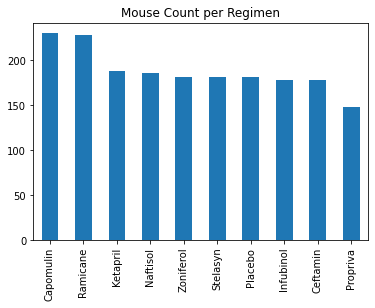

In [37]:
#Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas
#Create new DataFrame that captures value count of Drug Regimen
pandas_regimen_chart = clean_mouse_data['Drug Regimen'].value_counts()

#Use new DF to create Pandas bar chart 
pandas_regimen_chart.plot(kind='bar')

#Add chart and axis titles
plt.title('Mouse Count per Regimen')

plt.show()


In [ ]:
#Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

In [ ]:
#Generate a pie plot showing the distribution of female versus male mice using pandas

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 
  
    
    # Determine outliers using upper and lower bounds

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen